<a href="https://colab.research.google.com/github/AhmedTahaUWU/Solving-the-QAP-Using-Quantum-Annealing-in-Hospital-Resource-Allocation-During-Pandemics/blob/main/Quantum_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classical approach using brute force **

In [1]:
import numpy as np
from itertools import permutations

In [2]:
def compute_cost(F, D, P):
    """Compute the cost for a given permutation P."""
    n = len(P)
    cost = 0
    for i in range(n):
        for j in range(n):
            cost += F[i][j] * D[P[i]][P[j]]
    return cost

In [3]:
def find_optimal_qap_solution(F, D):
    """Find the optimal solution for the Quadratic Assignment Problem."""
    n = len(D)
    all_permutations = permutations(range(n))
    optimal_cost = float('inf')
    optimal_permutation = None

    for P in all_permutations:
        cost = compute_cost(F, D, P)
        if cost < optimal_cost:
            optimal_cost = cost
            optimal_permutation = P

    return optimal_permutation, optimal_cost

In [4]:
F = np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])

# Distance matrix
D = np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])

n = F.shape[0]  # Number of facilities/locations

# Find the optimal solution
optimal_permutation, optimal_cost = find_optimal_qap_solution(F, D)

# Output the results
print("Optimal Permutation:", optimal_permutation)
print("Optimal Cost:", optimal_cost)


Optimal Permutation: (0, 2, 1, 3)
Optimal Cost: 44


In [5]:
F = np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])

# Distance matrix
D = np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])

n = F.shape[0]  # Number of facilities/locations

# Find the optimal solution
optimal_permutation, optimal_cost = find_optimal_qap_solution(F, D)

# Output the results
print("Optimal Permutation:", optimal_permutation)
print("Optimal Cost:", optimal_cost)


Optimal Permutation: (0, 2, 1, 3)
Optimal Cost: 44


In [6]:
!pip install mealpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.3/386.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.0 MB/s eta 0:00:00


# **Classical approach using evolutionary algorithm**

In [7]:
from mealpy import PermutationVar, Problem,AGTO, DE
import numpy as np
from time import time

In [8]:
class QAP(Problem):
    def __init__(self, bounds=None, minmax="min", name="QAP", data=None, **kwargs):
        self.name = name
        self.data = data
        self.validate_data()
        super().__init__(bounds, minmax, **kwargs)

    def validate_data(self):
        # Validate input data for the QAP problem
        if "facilitiesFlow" not in self.data or "locationsDistance" not in self.data:
            raise ValueError("Input data must contain 'facilitiesFlow' and 'locationsDistance'")
        flow_shape = np.shape(self.data["facilitiesFlow"])
        dist_shape = np.shape(self.data["locationsDistance"])
        if len(flow_shape) != 2 or len(dist_shape) != 2 or flow_shape[0] != flow_shape[1] or dist_shape[0] != dist_shape[1]:
            raise ValueError("Input matrices must be square")
        if flow_shape[0] != dist_shape[0]:
            raise ValueError("Dimensions of input matrices must match")

    def obj_func(self, solution):
        flow = np.array(self.data["facilitiesFlow"])
        dist = np.array(self.data["locationsDistance"])
        # Convert solution to integer array
        solution = np.array(solution, dtype=int)
        # Use NumPy indexing and broadcasting for efficient computation
        total_cost = np.sum(dist * flow[solution[:, None], solution])
        return total_cost

In [9]:

data = {
    "locationsDistance": np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])
    ,
    "facilitiesFlow": np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])
}

n = F.shape[0]  # Number of facilities/locations
problem = QAP(bounds=PermutationVar(valid_set=list(range(n)), name="perm"), minmax="min", name="QAP", data=data,  save_population=True)
model =  DE.OriginalDE(epoch=100, pop_size=100)
g_best = model.solve(problem)
print(f"Best fitness: {g_best.target.fitness}, Best solution: {g_best.solution}")

INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 44.0, Global best: 44.0, Runtime: 0.02514 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 44.0, Global best: 44.0, Runtime: 0.02189 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 44.0, Global best: 44.0, Runtime: 0.02607 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 44.0, Global best: 44.0, Runtime: 0.02772 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 44.0, Global best: 44.0, Runtime: 0.02682 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 44.0, Global best: 44.0, Runtime: 0.02595 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 7, Current best: 44.0, Global best: 4

Best fitness: 44.0, Best solution: [2. 0. 3. 1.]


In [10]:
model.history.save_global_objectives_chart(filename="hello/goc")
model.history.save_local_objectives_chart(filename="hello/loc")

model.history.save_global_best_fitness_chart(filename="hello/gbfc")
model.history.save_local_best_fitness_chart(filename="hello/lbfc")

model.history.save_runtime_chart(filename="hello/rtc")

model.history.save_exploration_exploitation_chart(filename="hello/eec")

model.history.save_diversity_chart(filename="hello/dc")

model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello/tc")

In [11]:
n = 12
data = {
    "locationsDistance": np.array([
[0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5],
[1, 0, 1, 2, 2, 1, 2, 3, 3, 2, 3, 4],
[2, 1, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3],
[3, 2, 1, 0, 4, 3, 2, 1, 5, 4, 3, 2],
[1, 2, 3, 4, 0, 1, 2, 3, 1, 2, 3, 4],
[2, 1, 2, 3, 1, 0, 1, 2, 2, 1, 2, 3],
[3, 2, 1, 2, 2, 1, 0, 1, 3, 2, 1, 2],
[4, 3, 2, 1, 3, 2, 1, 0, 4, 3, 2, 1],
[2, 3, 4, 5, 1, 2, 3, 4, 0, 1, 2, 3],
[3, 2, 3, 4, 2, 1, 2, 3, 1, 0, 1, 2],
[4, 3, 2, 3, 3, 2, 1, 2, 2, 1, 0, 1],
[5, 4, 3, 2, 4, 3, 2, 1, 3, 2, 1, 0]]
    ),
    "facilitiesFlow": np.array(
[
[0,  5,  2,  4,  1,  0,  0,  6,  2,  1,  1,  1],
[5,  0,  3,  0,  2,  2,  2,  0,  4,  5,  0,  0],
[2,  3,  0,  0,  0,  0,  0,  5,  5,  2,  2,  2],
[4,  0,  0,  0,  5,  2,  2, 10,  0,  0,  5,  5],
[1,  2,  0,  5,  0, 10,  0,  0,  0,  5,  1,  1],
[0,  2,  0,  2, 10,  0,  5,  1,  1,  5,  4,  0],
[0,  2,  0,  2,  0,  5,  0, 10,  5,  2,  3,  3],
[6,  0,  5, 10,  0,  1, 10,  0,  0,  0,  5,  0],
[2,  4,  5,  0,  0,  1,  5,  0,  0,  0, 10, 10],
[1,  5,  2,  0,  5,  5,  2,  0,  0,  0,  5,  0],
[1,  0,  2,  5,  1,  4,  3,  5, 10,  5,  0,  2],
[1,  0,  2,  5,  1,  0,  3,  0, 10,  0,  2,  0]
])
}

problem = QAP(bounds=PermutationVar(valid_set=list(range(n)), name="perm"), minmax="min", name="QAP", data=data,  save_population=True)
model =  DE.OriginalDE(epoch=500, pop_size=100)
g_best = model.solve(problem)
print(f"Best fitness: {g_best.target.fitness}, Best solution: {g_best.solution}")

INFO:mealpy.evolutionary_based.DE.OriginalDE:Solving single objective optimization problem.
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 1, Current best: 690.0, Global best: 690.0, Runtime: 0.01736 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 2, Current best: 670.0, Global best: 670.0, Runtime: 0.01434 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 3, Current best: 660.0, Global best: 660.0, Runtime: 0.01467 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 4, Current best: 642.0, Global best: 642.0, Runtime: 0.01457 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 5, Current best: 642.0, Global best: 642.0, Runtime: 0.01490 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 6, Current best: 642.0, Global best: 642.0, Runtime: 0.01567 seconds
INFO:mealpy.evolutionary_based.DE.OriginalDE:>>>Problem: P, Epoch: 7, Current best: 642.0, G

Best fitness: 638.0, Best solution: [ 6  7 11  2  5 10  8  0  4  3  9  1]


In [12]:
model.history.save_global_objectives_chart(filename="hello1/goc")
model.history.save_local_objectives_chart(filename="hello1/loc")

model.history.save_global_best_fitness_chart(filename="hello1/gbfc")
model.history.save_local_best_fitness_chart(filename="hello1/lbfc")

model.history.save_runtime_chart(filename="hello1/rtc")

model.history.save_exploration_exploitation_chart(filename="hello1/eec")

model.history.save_diversity_chart(filename="hello1/dc")

model.history.save_trajectory_chart(list_agent_idx=[3, 5, 6, 7,], selected_dimensions=[3, 4], filename="hello1/tc")

# **Quantum approch using VQE **

In [13]:
!pip install qiskit
!pip install qiskit-optimization
!pip install docplex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 11.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 20.8 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.29.241-py3-none-any.whl size=685423 sha256=7821b40e36dce80

In [14]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators import from_docplex_mp
import numpy as np
import matplotlib.pyplot as plt

In [15]:


def QAP_as_ILP(N, flow_matrix, distance_matrix, print_model=False):

    # Step 1: Create a QUBO/ILP using Qiskit's QuadraticProgram
    model = QuadraticProgram()

    # Step 2: Define binary variables x_ik
    # Each facility i is assigned to one location k
    for i in range(N):
        for k in range(N):
            model.binary_var(f"x_{i}_{k}")

    # Step 3: Define the Objective Function using minimize()
    # Minimize the total cost = sum(f_ij * d_kl * x_ik * x_jl)
    quadratic_terms = {}
    for i in range(N):
        for j in range(N):
            for k in range(N):
                for l in range(N):
                    var1 = f"x_{i}_{k}"
                    var2 = f"x_{j}_{l}"
                    coefficient = flow_matrix[i][j] * distance_matrix[k][l]
                    if coefficient != 0:  # Avoid adding zero coefficients
                        quadratic_terms[(var1, var2)] = coefficient

    model.minimize(quadratic=quadratic_terms)

    # Step 4: Add Constraints
    # Constraint 1: Each facility is assigned to exactly one location
    for i in range(N):
        model.linear_constraint(
            linear={f"x_{i}_{k}": 1 for k in range(N)},
            sense="==",
            rhs=1,
            name=f"facility_assignment_{i}"
        )

    # Constraint 2: Each location hosts exactly one facility
    for k in range(N):
        model.linear_constraint(
            linear={f"x_{i}_{k}": 1 for i in range(N)},
            sense="==",
            rhs=1,
            name=f"location_assignment_{k}"
        )

    # Step 5: Print Model (Optional)
    if print_model:
        print(model.prettyprint())

    return model


In [16]:
from qiskit_optimization.converters import QuadraticProgramToQubo

In [17]:
def convert_ILP_to_QUBO(model, print_model = False):
    qubo = QuadraticProgramToQubo().convert(model)

    if print_model:
        print(qubo.prettyprint())

    return qubo

In [20]:
F = np.array([
        [0, 2, 3, 1],
        [2, 0, 1, 4],
        [3, 1, 0, 2],
        [1, 4, 2, 0]
])

# Distance matrix
D = np.array([
        [0, 1, 2, 3],
        [1, 0, 4, 2],
        [2, 4, 0, 1],
        [3, 2, 1, 0]
])
n=len(F)
print("QAP as ILP")
ilp_model = QAP_as_ILP(n,
                       F,
                       D,
                      print_model = True)

print("QAP as QUBO")
qubo_model = convert_ILP_to_QUBO(ilp_model,
                                print_model = True)

QAP as ILP
Problem name: 

Minimize
  4*x_0_0*x_1_1 + 8*x_0_0*x_1_2 + 12*x_0_0*x_1_3 + 6*x_0_0*x_2_1
  + 12*x_0_0*x_2_2 + 18*x_0_0*x_2_3 + 2*x_0_0*x_3_1 + 4*x_0_0*x_3_2
  + 6*x_0_0*x_3_3 + 4*x_0_1*x_1_0 + 16*x_0_1*x_1_2 + 8*x_0_1*x_1_3
  + 6*x_0_1*x_2_0 + 24*x_0_1*x_2_2 + 12*x_0_1*x_2_3 + 2*x_0_1*x_3_0
  + 8*x_0_1*x_3_2 + 4*x_0_1*x_3_3 + 8*x_0_2*x_1_0 + 16*x_0_2*x_1_1
  + 4*x_0_2*x_1_3 + 12*x_0_2*x_2_0 + 24*x_0_2*x_2_1 + 6*x_0_2*x_2_3
  + 4*x_0_2*x_3_0 + 8*x_0_2*x_3_1 + 2*x_0_2*x_3_3 + 12*x_0_3*x_1_0
  + 8*x_0_3*x_1_1 + 4*x_0_3*x_1_2 + 18*x_0_3*x_2_0 + 12*x_0_3*x_2_1
  + 6*x_0_3*x_2_2 + 6*x_0_3*x_3_0 + 4*x_0_3*x_3_1 + 2*x_0_3*x_3_2
  + 2*x_1_0*x_2_1 + 4*x_1_0*x_2_2 + 6*x_1_0*x_2_3 + 8*x_1_0*x_3_1
  + 16*x_1_0*x_3_2 + 24*x_1_0*x_3_3 + 2*x_1_1*x_2_0 + 8*x_1_1*x_2_2
  + 4*x_1_1*x_2_3 + 8*x_1_1*x_3_0 + 32*x_1_1*x_3_2 + 16*x_1_1*x_3_3
  + 4*x_1_2*x_2_0 + 8*x_1_2*x_2_1 + 2*x_1_2*x_2_3 + 16*x_1_2*x_3_0
  + 32*x_1_2*x_3_1 + 8*x_1_2*x_3_3 + 6*x_1_3*x_2_0 + 4*x_1_3*x_2_1
  + 2*x_1_3*x_2_2 + 24*x

In [21]:
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from itertools import combinations_with_replacement

In [22]:
# define the solver to have the exact solution
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())

In [23]:
result = exact.solve(qubo_model)


In [24]:
def interpret_qap_solution(solution_string):
    """
    Parses and interprets the QAP solution string, returning a readable interpretation.

    Parameters:
        solution_string (str): The encoded solution string.

    Returns:
        str: A human-readable interpretation of the solution.
    """
    # Ensure input is treated as a string
    solution_string = str(solution_string)
    assignments = {}

    # Debug: Print the input string
    print("Input string:")
    print(solution_string)

    # Parse "variable values"
    for item in solution_string.split(","):
        item = item.strip()  # Remove extra spaces
        if "=" in item and "x_" in item:  # Look for variable assignments
            variable, value = item.split("=")
            if float(value) == 1.0:
                _, facility, location = variable.split("_")
                assignments[int(facility)] = int(location)

    # Debug: Print parsed assignments
    print(f"Parsed assignments: {assignments}")

    # Build readable interpretation
    interpretation = ["QAP Solution Interpretation:"]
    for facility, location in sorted(assignments.items()):
        interpretation.append(f"  - Facility {facility} is assigned to Location {location}.")

    # Add "objective function value"
    if any("fval=" in item for item in solution_string.split(",")):
        for item in solution_string.split(","):
            if "fval=" in item:
                objective_value = item.split("=")[1].strip()
                interpretation.append(f"Objective function value: {objective_value}")
                break

    # Add "status"
    if any("status=" in item for item in solution_string.split(",")):
        for item in solution_string.split(","):
            if "status=" in item:
                status = item.split("=")[1].strip()
                interpretation.append(f"Status: {status}")
                break

    # Debug: Print the final interpretation
    print(f"Final interpretation: {interpretation}")

    return '  '.join(interpretation)

In [25]:
interpret_qap_solution(result)

Input string:
fval=44.0, x_0_0=1.0, x_0_1=0.0, x_0_2=0.0, x_0_3=0.0, x_1_0=0.0, x_1_1=0.0, x_1_2=1.0, x_1_3=0.0, x_2_0=0.0, x_2_1=1.0, x_2_2=0.0, x_2_3=0.0, x_3_0=0.0, x_3_1=0.0, x_3_2=0.0, x_3_3=1.0, status=SUCCESS
Parsed assignments: {0: 0, 1: 2, 2: 1, 3: 3}
Final interpretation: ['QAP Solution Interpretation:', '  - Facility 0 is assigned to Location 0.', '  - Facility 1 is assigned to Location 2.', '  - Facility 2 is assigned to Location 1.', '  - Facility 3 is assigned to Location 3.', 'Objective function value: 44.0', 'Status: SUCCESS']


'QAP Solution Interpretation:    - Facility 0 is assigned to Location 0.    - Facility 1 is assigned to Location 2.    - Facility 2 is assigned to Location 1.    - Facility 3 is assigned to Location 3.  Objective function value: 44.0  Status: SUCCESS'

In [26]:
!pip install dwave-ocean-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.2 MB/s eta 0:00:00


In [27]:
from dimod.binary import BinaryQuadraticModel
from dwave.samplers import SimulatedAnnealingSampler

In [28]:
sampler = SimulatedAnnealingSampler()

In [29]:
dwave_qubo = BinaryQuadraticModel(qubo_model.objective.linear.to_dict(),
                                  qubo_model.objective.quadratic.to_dict(),
                                  qubo_model.objective.constant,
                                  'BINARY')

samplerset = sampler.sample(dwave_qubo, num_reads = 1000)

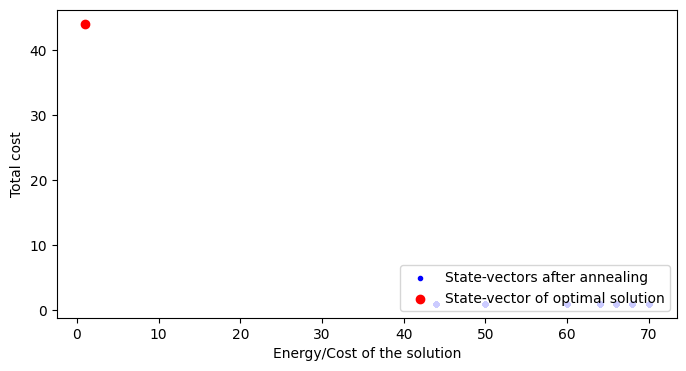

In [30]:
fig, ax = plt.subplots(figsize = (8,4))

bins_used = []
energies = []

for solution, energy, _ in samplerset.record:
    solution = np.array(solution)[:n*(n+1)].reshape(n,-1)
    bins_used.append(sum(solution[:,0]))
    energies.append(energy)

ax.scatter(energies, bins_used, color = 'b', marker = '.', label = 'State-vectors after annealing')

solution = list(samplerset.first.sample.values())
solution = np.array(solution)[:n*(n+1)].reshape(n,-1)
energies = samplerset.first.energy

ax.scatter([sum(solution[:,0])], [energies], color = 'r', marker = 'o', label = 'State-vector of optimal solution')
ax.set_ylabel('Total cost')
ax.set_xlabel('Energy/Cost of the solution')

plt.legend(loc = 'lower right')
plt.show()

In [31]:
possible_solutions = list(filter(lambda x: x[1]==samplerset.first.energy,samplerset.record))
print("Minimum energy:", samplerset.first.energy)
print("Number of vectors with minimum energy:", len(possible_solutions))

Minimum energy: 44.0
Number of vectors with minimum energy: 176


In [32]:
!pip install qiskit_ibm_runtime==0.29.0
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.1 MB/s eta 0:00:00


In [33]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator, SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from scipy.optimize import minimize

In [34]:
def VQE_for_QAP(qubo, ansatz):
    #define a cost_function which constructs and evaluate the ansatz
    # with some parameters and returns the expectation value of the hamiltonian obtained from the QUBO
    def cost_func(params, in_ansatz, hamiltonian, estimator, callback_dict):
        pub = (in_ansatz, [hamiltonian], [params])
        result = estimator.run([pub]).result()
        energy = result[0].data.evs[0]

        callback_dict["iters"] += 1
        callback_dict["prev_vector"] = params
        callback_dict["cost_history"].append(energy)
        return energy, result

    #a function compatible with scipy's minimize function
    def cost_func_2(*args, **kwargs):
        energy, result = cost_func(*args, **kwargs)
        return energy

    backend = AerSimulator() # a backend for local simulations
    pm = generate_preset_pass_manager(backend = backend,
                                      optimization_level = 1) # a pass manager to make the circuit compatible with backend
    isa_circuit = pm.run(ansatz) # a circuit that obeys the backend's instruction set arquitecture (ISA)
    H = qubo.to_ising()[0].apply_layout(layout=isa_circuit.layout) # Ising hamiltonian from the QUBO and compatible with isa_circuit layout

    # a dictionary to store results
    callback_dict = {
        "prev_vector": None,
        "iters": 0,
        "cost_history": [],
    }

    x0 = [np.pi/2]*ansatz.num_parameters # initial parameters

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
        method="cobyla",
        options={'maxiter': 700}) # optimization step

    ansatz.measure_all() #add classical registers and measurements to ansatzs circuit
    pm = generate_preset_pass_manager(backend = backend,
                                      optimization_level = 1)
    isa_circuit = pm.run(ansatz)
    sampler = Sampler(backend = backend)

    job = sampler.run([(isa_circuit, callback_dict["prev_vector"], 10240)]) #run the circuit with best fit parameters
    result = job.result()
    solution = result[0].data.meas.get_counts()

    return callback_dict, solution

In [35]:
ansatz_1 = TwoLocal(num_qubits = len(qubo_model.variables),
                 rotation_blocks = ["rx"],
                 entanglement_blocks = ["cx"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [36]:
ansatz_2 = TwoLocal(num_qubits = len(qubo_model.variables),
                 rotation_blocks = ["rx","ry"],
                 entanglement_blocks = ["cz"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [37]:
ansatz_3 = EfficientSU2(num_qubits = len(qubo_model.variables),
                 su2_gates = ["rx","ry"],
                 entanglement = "full",
                 reps = 1,
                 insert_barriers = True)

In [38]:
ansatz_4 = EfficientSU2(num_qubits = len(qubo_model.variables),
                 su2_gates = ["rx"],
                 entanglement = "circular",
                 reps = 1,
                 insert_barriers = True)

In [39]:
res_all_ansatz = []
sol_all_ansatz = []

for an in (ansatz_1, ansatz_2, ansatz_3, ansatz_4,):
    res_energies, result = VQE_for_QAP(qubo = qubo_model,
                                       ansatz = an)
    max_counts = max(result, key = lambda x: result[x])
    res_all_ansatz.append(res_energies)
    sol_all_ansatz.append({max_counts : result[max_counts]})

<ipython-input-34-d68bc1193006>:37: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
<ipython-input-34-d68bc1193006>:45: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend = backend)
<ipython-input-34-d68bc1193006>:37: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  args=(isa_circuit, H, Estimator(backend = backend), callback_dict),
<ipython-input-34-d68bc1193006>:45: DeprecationWarning: The 'backend' keyword arguments a

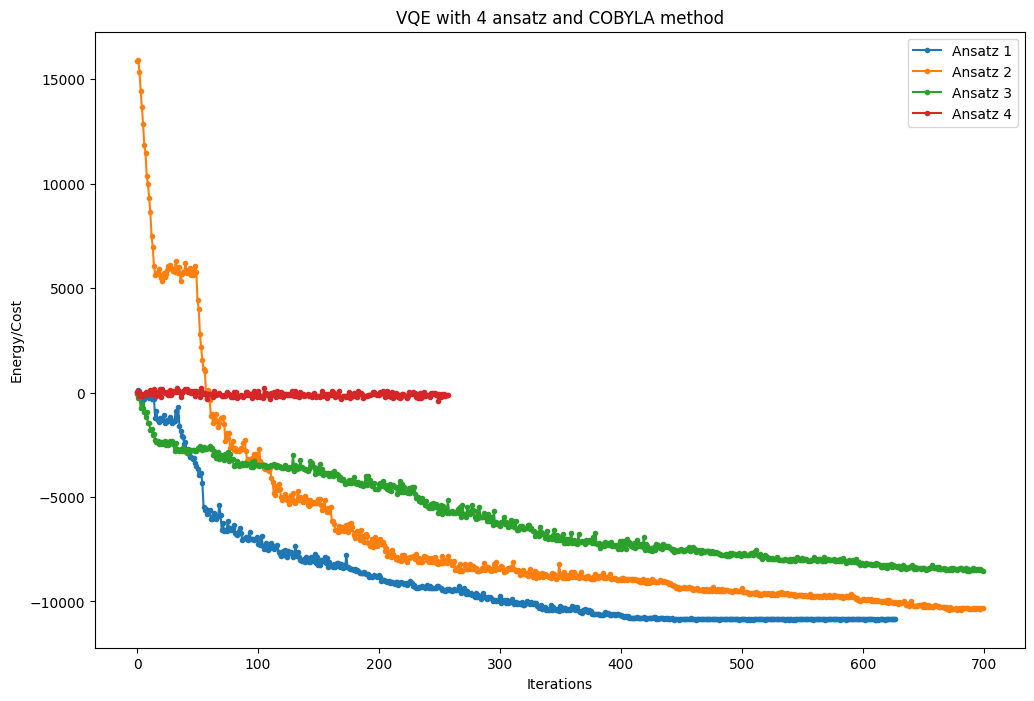

In [40]:
fig, ax = plt.subplots(figsize = (12,8))

for i, an in enumerate(res_all_ansatz):
    ax.plot(range(an["iters"]), an["cost_history"], marker = ".", ls = "-", label = f"Ansatz {i+1}")

ax.set_xlabel("Iterations")
ax.set_ylabel("Energy/Cost")
ax.set_title("VQE with 4 ansatz and COBYLA method")
plt.legend(loc = "upper right")
plt.show()

In [41]:
for i,(bits,counts) in enumerate((list(x.items())[0] for x in sol_all_ansatz)):
    print(f"Ansatz {i+1} \t Counts : {counts}")
    print(f"Solution bitstring : {bits[::-1]}")
    bits = list(bits[::-1])
    bits = np.array(list(map(int,bits)))

Ansatz 1 	 Counts : 9566
Solution bitstring : 0010100000010100
Ansatz 2 	 Counts : 3483
Solution bitstring : 1000010000100001
Ansatz 3 	 Counts : 1082
Solution bitstring : 0001101000000100
Ansatz 4 	 Counts : 6
Solution bitstring : 0001100011001111
